## Overview
Plot graphs to see the distribution of data. and the accuracy of numerical data for ANOVA.

### Objective
### Preliminary Analysis
**1. Distribution (Normality)**
- 1.1 Histrogram
- 1.2 Barplot
- 1.3 Q-Q Plot

**2. Homogeneity of Variance**
- Use **Levene’s Test** to examine the equality of variances across groups, checking whether **p-value > 0.05**.
- If the p-value is greater than 0.05, it indicates that the variances are equal among the groups.

**3. Data Characteristics (Numerical Data)**
- Verify that **Coinsurance** is a **numerical variable** suitable for conducting an **ANOVA** test.

### Test Two-Way ANOVA
- Test Two-Way ANOVA by pingouin

### 1. Loading and inspecting dataset
#### import library
1. pandas that it allows you to create, manipulate, and analyze datasets efficiently.
2. numpy that it provides support for arrays, matrices, and various mathematical functions.
3. seaborn that it provides high-level functions to create attractive and informative plots.
4. matplotlib is a foundational library for creating static, interactive, and animated visualizations.
5. scipy.stats for a variety of statistical tests such as t-tests, ANOVA, and probability calculations.
6. statsmodels.stats.weightstats used for hypothesis testing, such as z-tests and t-tests, where the weight of the data is taken into account.

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

   Unnamed: 0 AgeGroup  Age   PlanType  Coinsurance Percentage  Coinsurance
0           0     0-20   20        PPO                      40         0.40
1         658     0-20   20        PPO                      39         0.39
2         659     0-20   20  Indemnity                      45         0.45
3         660     0-20   20        PPO                      23         0.23
4         661     0-20   20        EPO                      14         0.14


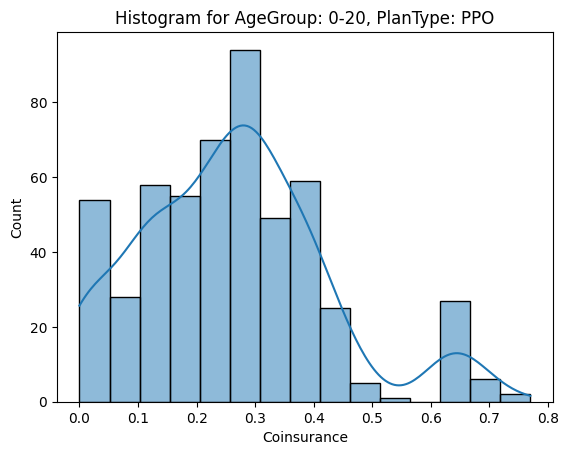

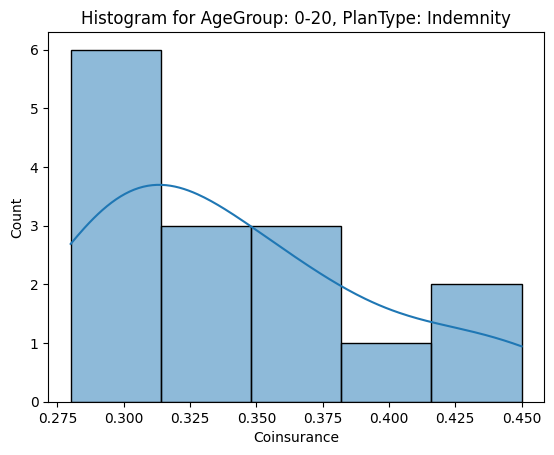

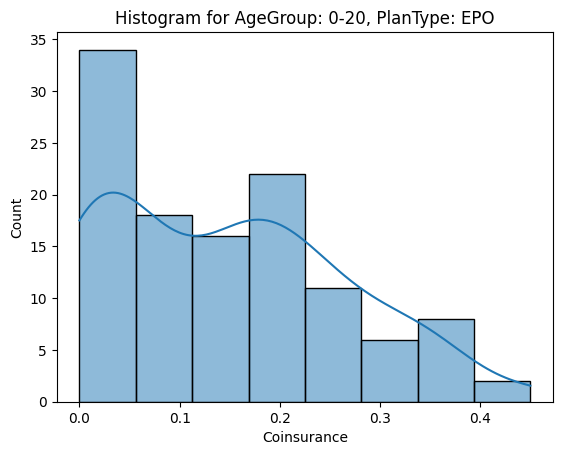

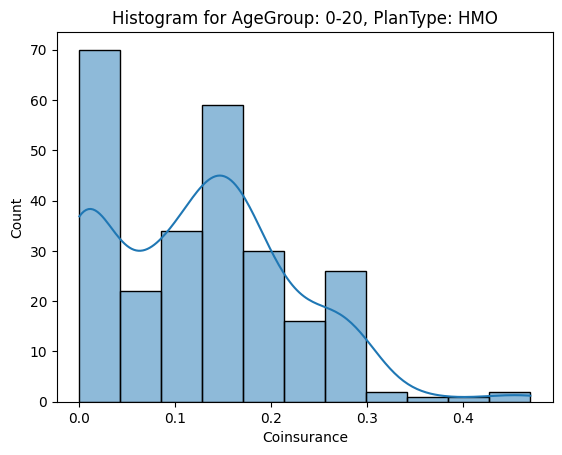

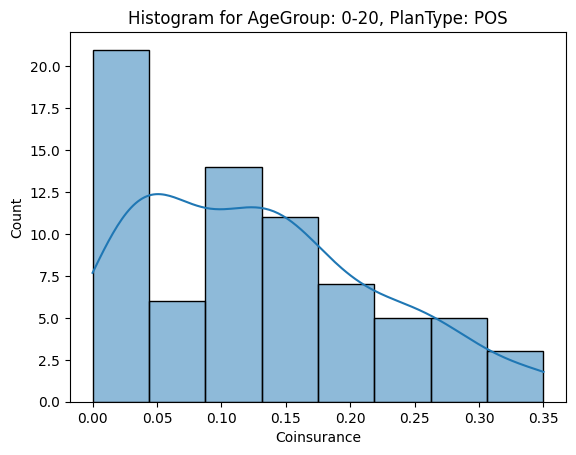

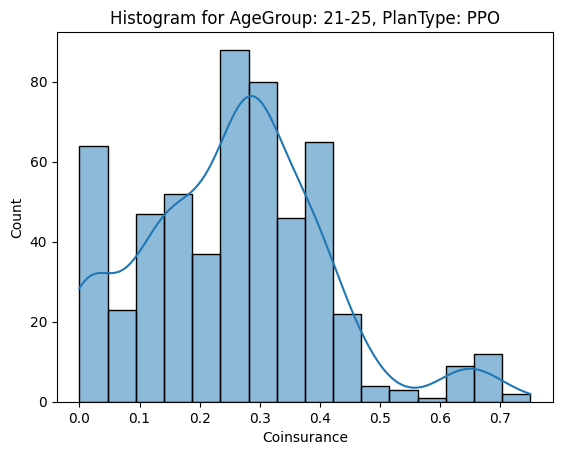

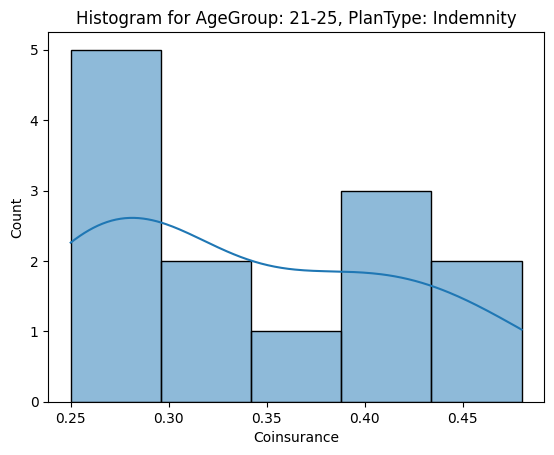

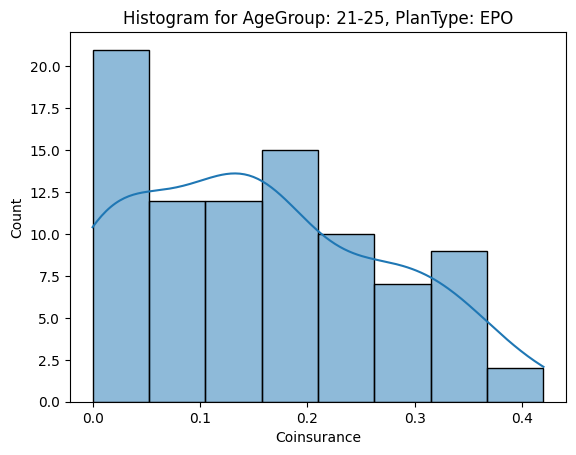

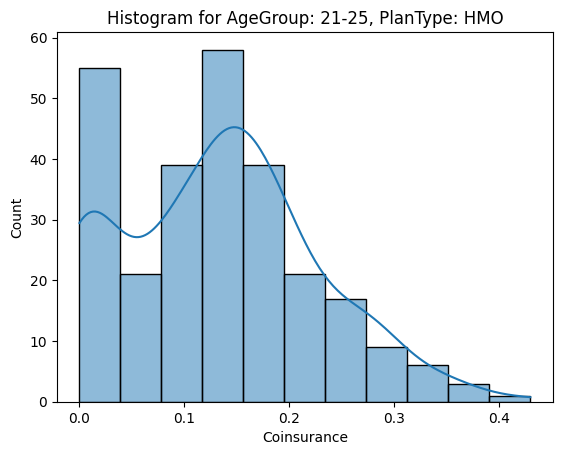

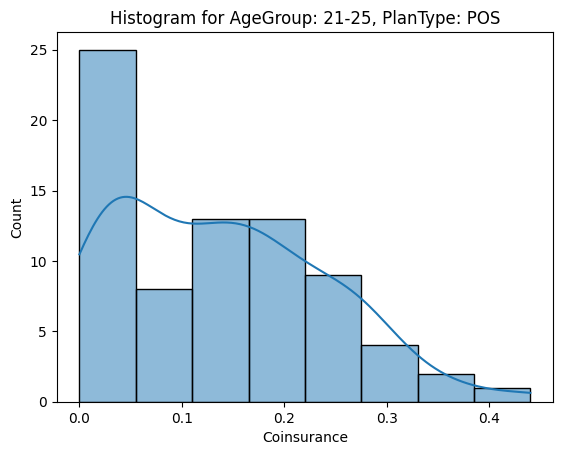

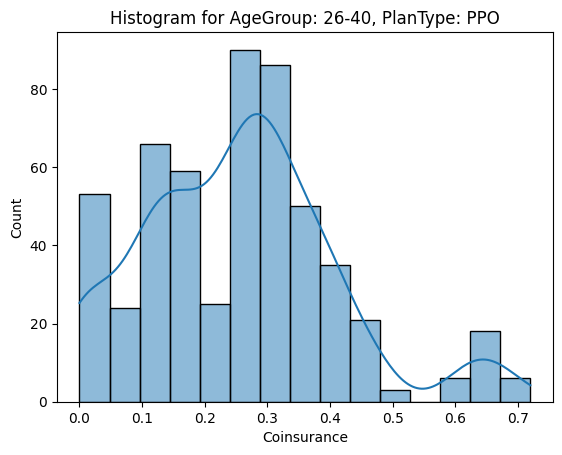

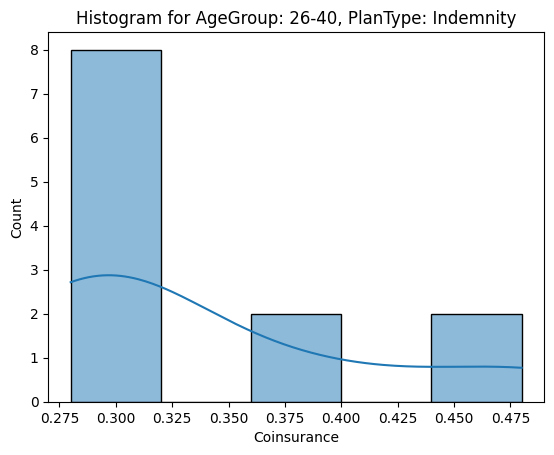

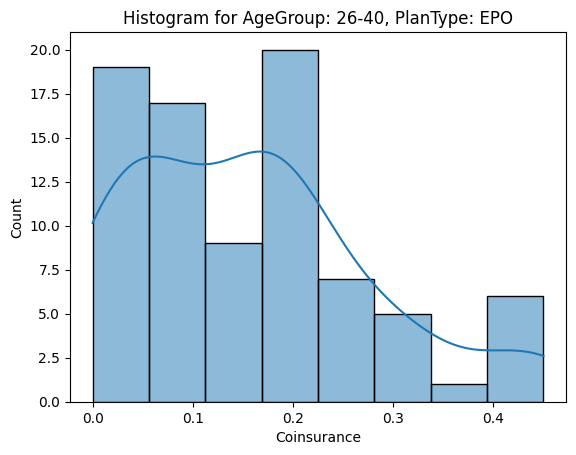

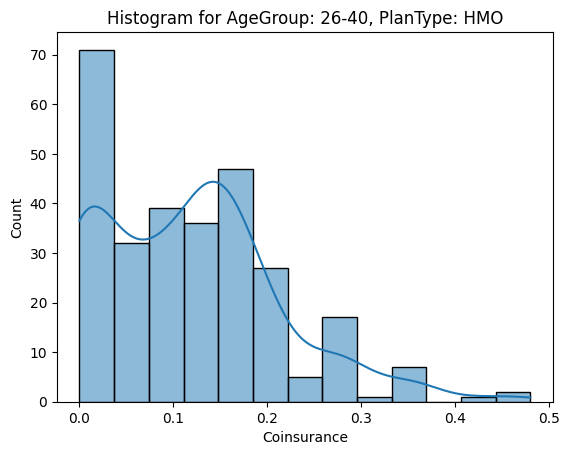

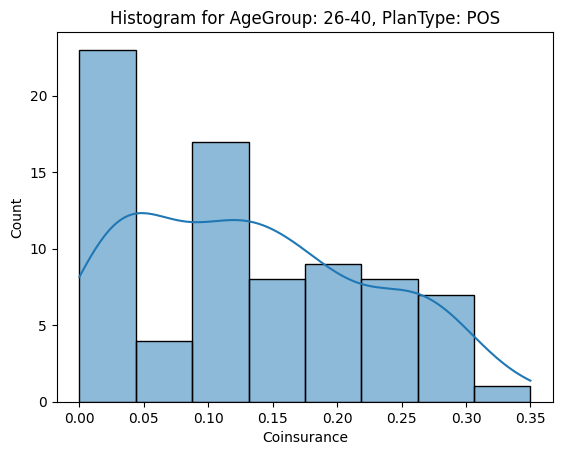

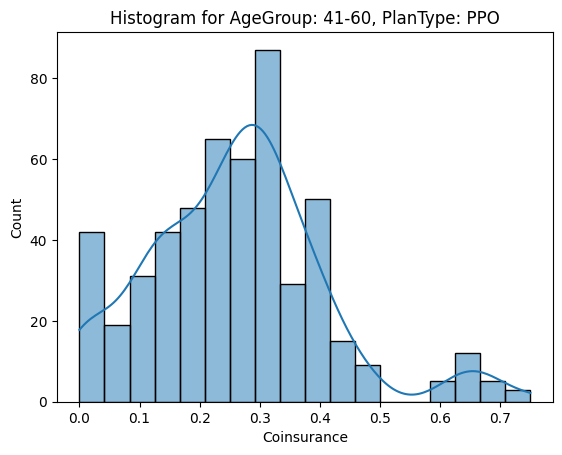

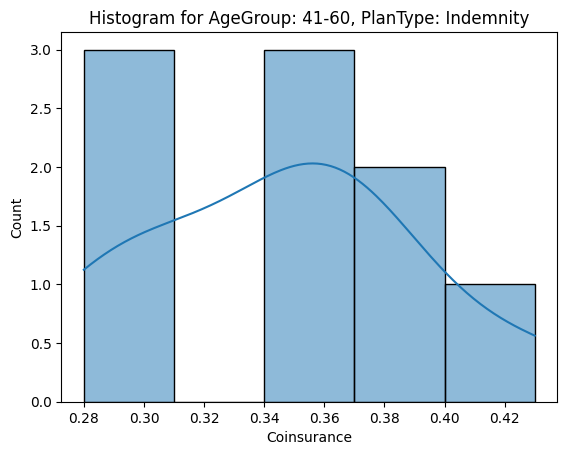

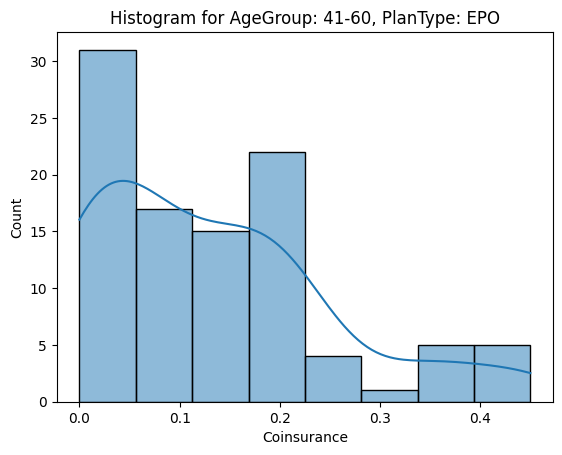

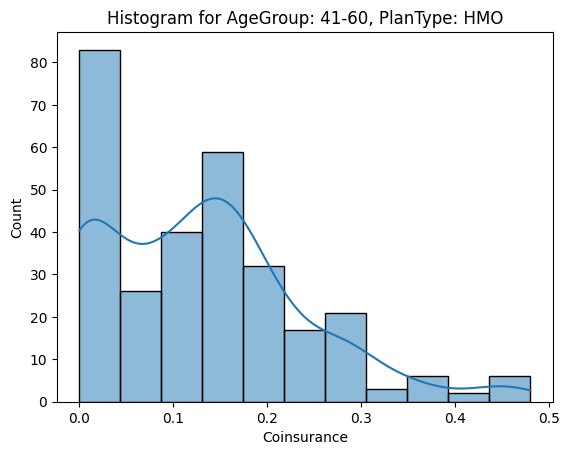

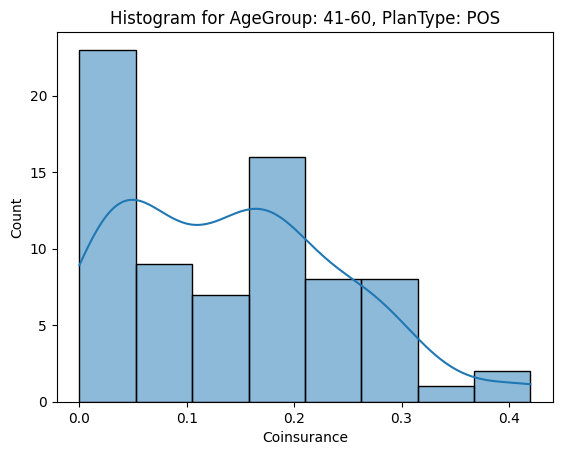

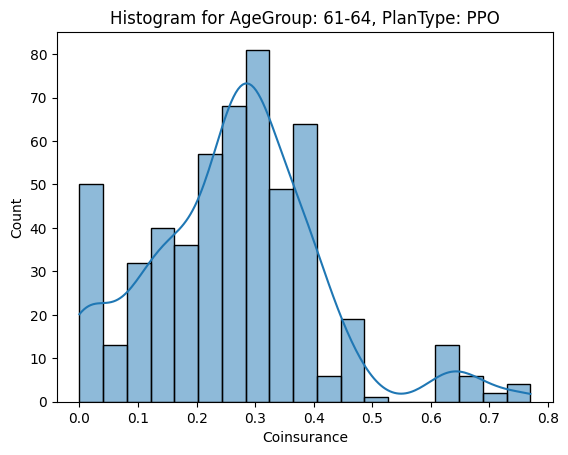

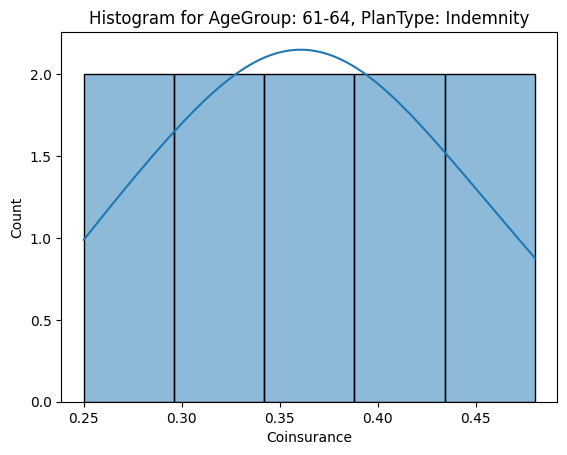

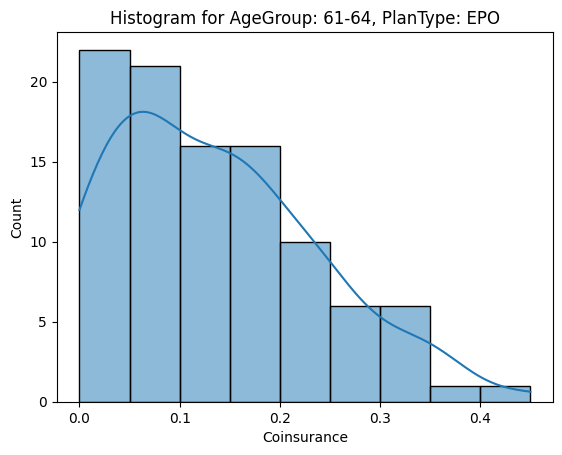

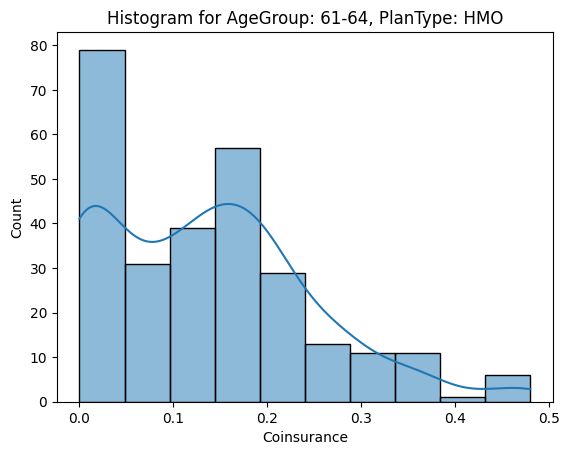

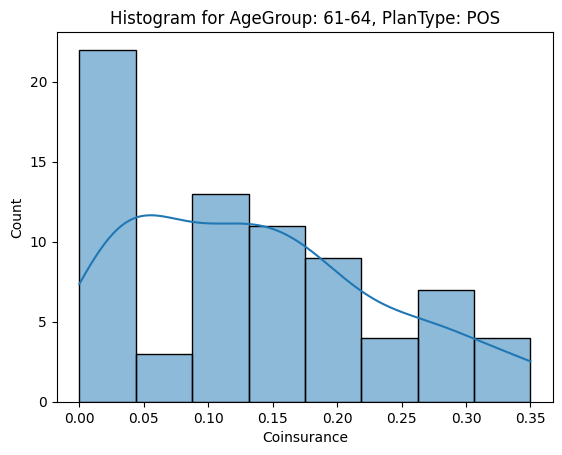

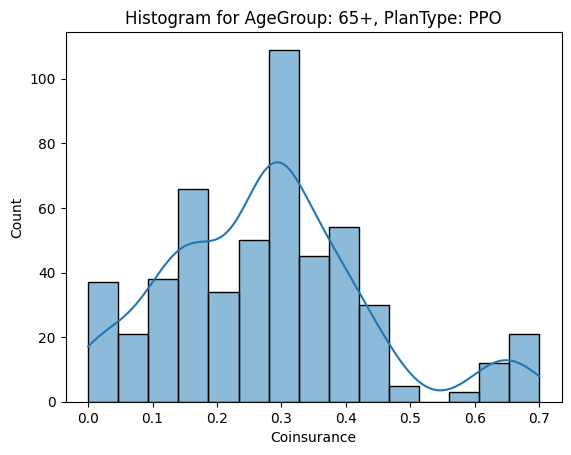

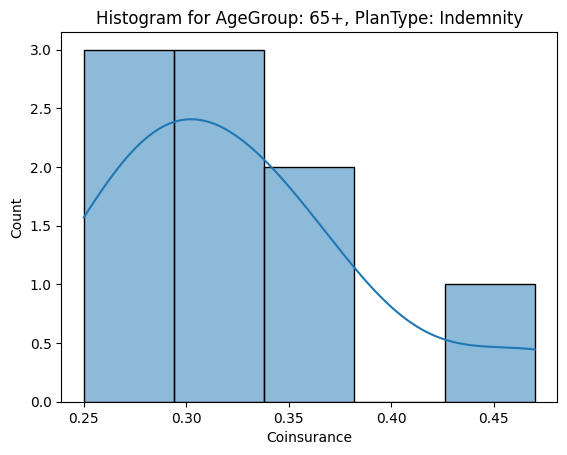

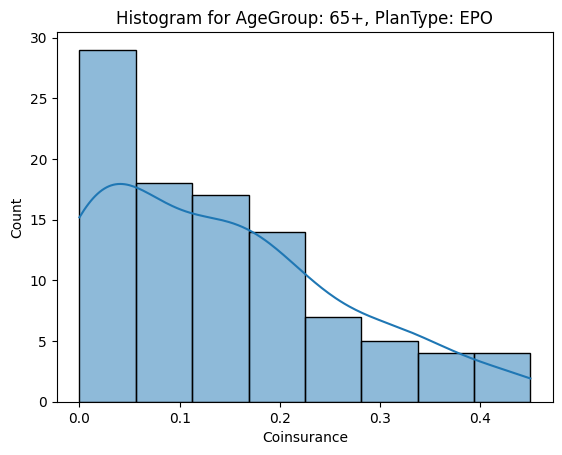

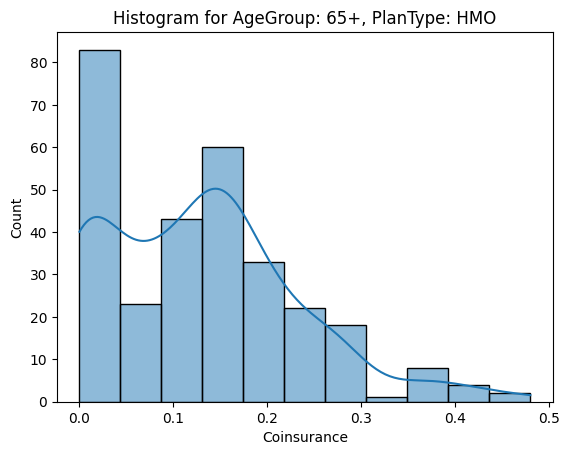

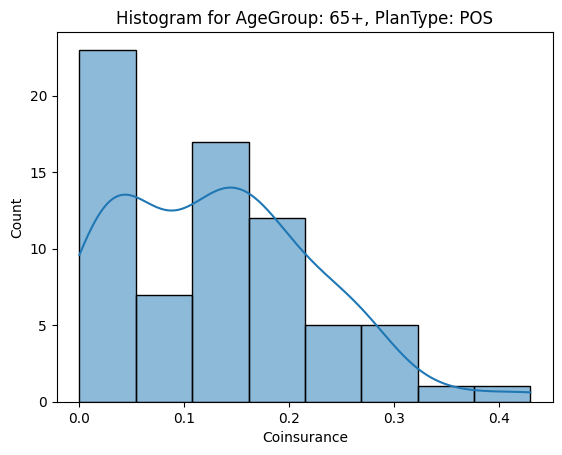

In [31]:
# Load the dataset from Binning-Use.ipynb
df = pd.read_csv('final_binning.csv')

# Show basic information
print(df.head())

# 1. Check the distribution of data (Normality)
# We will check normality for each age group and plan type (PlanType)

# Select the column you want to test
age_groups = df['AgeGroup'].unique()  # AgeGroup
plan_types = df['PlanType'].unique()  # PlanType

# 1.1 Draw a histogram for checking dispersion
for age in age_groups:
    for plan in plan_types:
        subset = df[(df['AgeGroup'] == age) & (df['PlanType'] == plan)]
        sns.histplot(subset['Coinsurance'], kde=True)
        plt.title(f'Histogram for AgeGroup: {age}, PlanType: {plan}')
        plt.show()

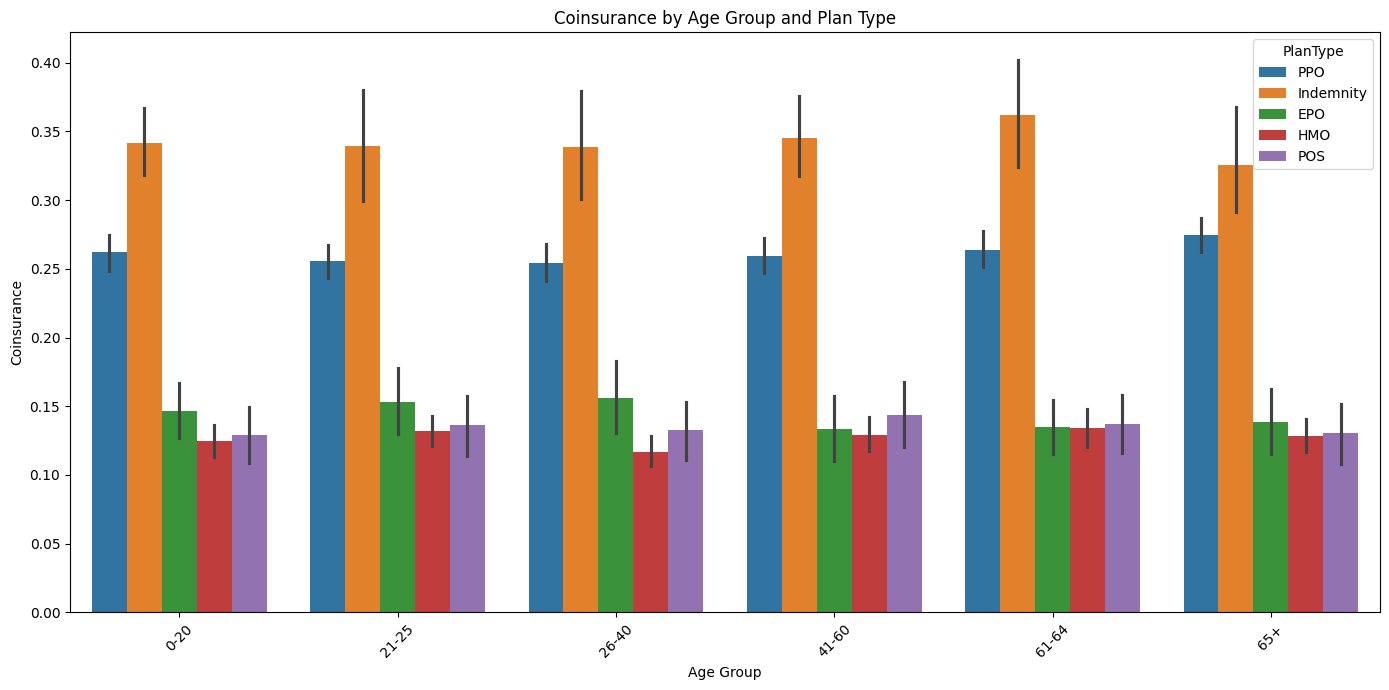

In [32]:
# 1.2 Barplot
df = pd.read_csv('final_binning.csv')

plt.figure(figsize=(14, 7))
sns.barplot(x='AgeGroup', y='Coinsurance', hue='PlanType', data=df)
plt.xlabel('Age Group')
plt.ylabel('Coinsurance')
plt.title('Coinsurance by Age Group and Plan Type')
plt.legend(title='PlanType')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

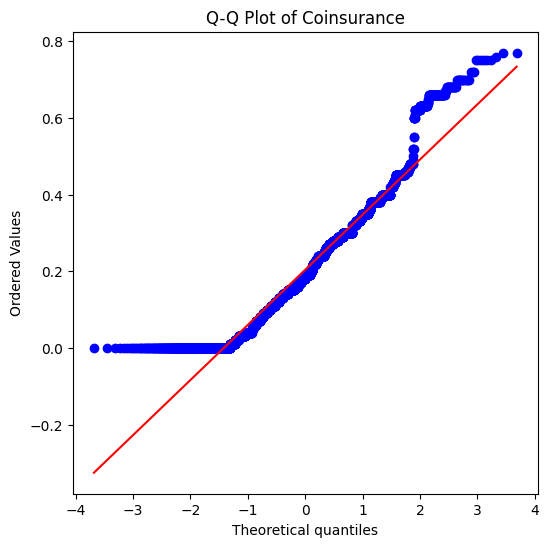

In [33]:
# 1.3 Check Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(df['Coinsurance'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Coinsurance')
plt.show()

In [34]:
# 2. Check equality of variances (Homogeneity of Variance).
# Use Levene's Test to check equality of variances.
# This example uses Copayment as the test variable
copayment_values = [df[df['AgeGroup'] == age]['Coinsurance'].values for age in age_groups]

# Levene's Test for equal variances was performed.
stat, p_value = levene(*copayment_values)
print(f"Levene's Test for Homogeneity of Variance, p-value: {p_value}")
if p_value > 0.05:
    print("The variances are homogenous.")
else:
    print("The variances are not homogenous.")


Levene's Test for Homogeneity of Variance, p-value: 0.804442810550771
The variances are homogenous.


In [35]:
# 3. Check the nature of the data (Numerical Data)
# Verify that 'Copayment' is a numeric variable.
if pd.api.types.is_numeric_dtype(df['Coinsurance']):
    print("The 'Coinsurance' column contains numerical data.")
else:
    print("The 'Coinsurance' column does not contain numerical data.")

The 'Coinsurance' column contains numerical data.


### TWO-Way ANOVA test by pingouin library


In [36]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [37]:
import pingouin as pg

# Test Two-Way ANOVA by pingouin
anova_result = pg.anova(dv='Coinsurance', between=['AgeGroup', 'PlanType'], data=df, detailed=True)

print(anova_result)
#p-unc: p-value
#F: F statistic
#np2: R-squared
# p-unc = p-value
# if p-value < alpha value (0.05) => Reject H0
# if p-value > alpha value (0.05) => Fail to reject H0


                Source          SS      DF        MS           F  \
0             AgeGroup    0.086137     5.0  0.017227    0.982485   
1             PlanType   26.112719     4.0  6.528180  372.305836   
2  AgeGroup * PlanType    0.172878    20.0  0.008644    0.492966   
3             Residual  104.680693  5970.0  0.017534         NaN   

           p-unc       np2  
0   4.267589e-01  0.000822  
1  1.171894e-286  0.199649  
2   9.705367e-01  0.001649  
3            NaN       NaN  


### Summary Coinsurance
- Age group: 0.4267589 (4.267589e-01) > 0.05 => Fail to reject H0
- Plan type: 0.000...1171894 (1.171894e-286) < 0.05 => Reject H0
- Age group & Plan type: 0.9705367 (9.705367e-01) > 0.05 => Fail to reject H0
- These results indicate that **Plan Type** is the only factor with a statistically significant effect on copayment
